In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn import decomposition
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold

In [4]:
from sklearn.datasets import load_wine
wine = load_wine()

scaler = StandardScaler()
X = scaler.fit_transform(wine.data)
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=None)

In [5]:
# knn 모델에서 최적의 모델 찾기
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29], 'p': [1, 2]}
knn_cv5 = GridSearchCV(knn, params_knn, cv=5, scoring='accuracy').fit(X_train, y_train)
knn_cv10 = GridSearchCV(knn, params_knn, cv=10, scoring='accuracy').fit(X_train, y_train)
knn_cv15 = GridSearchCV(knn, params_knn, cv=15, scoring='accuracy').fit(X_train, y_train)
knn_cv20 = GridSearchCV(knn, params_knn, cv=20, scoring='accuracy').fit(X_train, y_train)
knn_loo = GridSearchCV(knn, params_knn, cv=LeaveOneOut(), scoring='accuracy').fit(X_train, y_train)

In [6]:
print("1. knn")
print("case 1 : 5 folds\nparams : {}, score : {}".format(knn_cv5.best_params_, knn_cv5.best_score_))
print("case 2 : 10 folds\nparams : {}, score : {}".format(knn_cv10.best_params_, knn_cv10.best_score_))
print("case 3 : 15 folds\nparams : {}, score : {}".format(knn_cv15.best_params_, knn_cv15.best_score_))
print("case 4 : 20 folds\nparams : {}, score : {}".format(knn_cv20.best_params_, knn_cv20.best_score_))
print("case 5 : Leave one out\nparams : {}, score : {}".format(knn_loo.best_params_, knn_loo.best_score_))
knn = knn_cv5.best_estimator_

1. knn
case 1 : 5 folds
params : {'n_neighbors': 3, 'p': 1}, score : 0.98125
case 2 : 10 folds
params : {'n_neighbors': 3, 'p': 1}, score : 0.98125
case 3 : 15 folds
params : {'n_neighbors': 11, 'p': 1}, score : 0.993939393939394
case 4 : 20 folds
params : {'n_neighbors': 11, 'p': 1}, score : 0.9875
case 5 : Leave one out
params : {'n_neighbors': 11, 'p': 1}, score : 0.9875


In [7]:
# decision tree 모델에서 최적의 모델 찾기

tree = DecisionTreeClassifier()
params_tree = {'criterion': ['entropy', 'gini'],
              'max_depth': np.arange(1,10)}
tree_cv5 = GridSearchCV(tree, params_tree, cv=5, scoring='accuracy').fit(X_train, y_train)
tree_cv10 = GridSearchCV(tree, params_tree, cv=10, scoring='accuracy').fit(X_train, y_train)
tree_cv15 = GridSearchCV(tree, params_tree, cv=15, scoring='accuracy').fit(X_train, y_train)
tree_cv20 = GridSearchCV(tree, params_tree, cv=20, scoring='accuracy').fit(X_train, y_train)
tree_loo = GridSearchCV(tree, params_tree, cv=LeaveOneOut(), scoring='accuracy').fit(X_train, y_train)

In [8]:
print("2. tree")
print("case 1 : 5 fold\nparams : {}, score : {}".format(tree_cv5.best_params_, tree_cv5.best_score_))
print("case 2 : 10 fold\nparams : {}, score : {}".format(tree_cv10.best_params_, tree_cv10.best_score_))
print("case 3 : 15 fold\nparams : {}, score : {}".format(tree_cv15.best_params_, tree_cv15.best_score_))
print("case 4 : 20 fold\nparams : {}, score : {}".format(tree_cv20.best_params_, tree_cv20.best_score_))
print("case 5 : Leave one out\nparams : {}, score : {}".format(tree_loo.best_params_, tree_loo.best_score_))
tree = knn_cv5.best_estimator_

2. tree
case 1 : 5 fold
params : {'criterion': 'entropy', 'max_depth': 6}, score : 0.95
case 2 : 10 fold
params : {'criterion': 'entropy', 'max_depth': 6}, score : 0.9375
case 3 : 15 fold
params : {'criterion': 'entropy', 'max_depth': 7}, score : 0.9569696969696969
case 4 : 20 fold
params : {'criterion': 'entropy', 'max_depth': 6}, score : 0.94375
case 5 : Leave one out
params : {'criterion': 'entropy', 'max_depth': 4}, score : 0.9375


In [9]:
# SVM 모델에서 최적의 모델 찾기

svm = SVC()
params_svm = {'C':[0.01, 0.1, 1, 10],
             'gamma':[0.1, 0.01, 0.001, 0.0001],
             'kernel':['rbf', 'poly', 'linear']}
svm_cv5 = GridSearchCV(svm, params_svm, cv=5, scoring='accuracy').fit(X_train, y_train)
svm_cv10 = GridSearchCV(svm, params_svm, cv=10, scoring='accuracy').fit(X_train, y_train)
svm_cv15 = GridSearchCV(svm, params_svm, cv=15, scoring='accuracy').fit(X_train, y_train)
svm_cv20 = GridSearchCV(svm, params_svm, cv=20, scoring='accuracy').fit(X_train, y_train)
svm_loo = GridSearchCV(svm, params_svm, cv=LeaveOneOut(), scoring='accuracy').fit(X_train, y_train)

In [10]:
print("3. svm")
print("case 1 : 5 fold\nparams : {}, score : {}".format(svm_cv5.best_params_, svm_cv5.best_score_))
print("case 2 : 10 fold\nparams : {}, score : {}".format(svm_cv10.best_params_, svm_cv10.best_score_))
print("case 3 : 15 fold\nparams : {}, score : {}".format(svm_cv15.best_params_, svm_cv15.best_score_))
print("case 4 : 20 fold\nparams : {}, score : {}".format(svm_cv20.best_params_, svm_cv20.best_score_))
print("case 5 : Leave one out\nparams : {}, score : {}".format(svm_loo.best_params_, svm_loo.best_score_))
svm = svm_cv5.best_estimator_

3. svm
case 1 : 5 fold
params : {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, score : 0.9875
case 2 : 10 fold
params : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, score : 0.98125
case 3 : 15 fold
params : {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}, score : 0.9818181818181818
case 4 : 20 fold
params : {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}, score : 0.98125
case 5 : Leave one out
params : {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}, score : 0.9875


In [11]:
# Random forest 모델에서 최적의 모델 찾기

forest = RandomForestClassifier()
params_forest = {'n_estimators':[1, 5, 10, 15, 20],
             'criterion':['gini','entropy'],
                'max_depth':[2,3,4,5]}
forest_cv5 = GridSearchCV(forest, params_forest, cv=5, scoring='accuracy').fit(X_train, y_train)
forest_cv10 = GridSearchCV(forest, params_forest, cv=10, scoring='accuracy').fit(X_train, y_train)
forest_cv15 = GridSearchCV(forest, params_forest, cv=15, scoring='accuracy').fit(X_train, y_train)
forest_cv20 = GridSearchCV(forest, params_forest, cv=20, scoring='accuracy').fit(X_train, y_train)
forest_loo = GridSearchCV(forest, params_forest, cv=LeaveOneOut(), scoring='accuracy').fit(X_train, y_train)

In [12]:
print("4. random forest")
print("case 1 : 5 fold\nparams : {}, score : {}".format(forest_cv5.best_params_, forest_cv5.best_score_))
print("case 2 : 10 fold\nparams : {}, score : {}".format(forest_cv10.best_params_, forest_cv10.best_score_))
print("case 3 : 15 fold\nparams : {}, score : {}".format(forest_cv15.best_params_, forest_cv15.best_score_))
print("case 4 : 20 fold\nparams : {}, score : {}".format(forest_cv20.best_params_, forest_cv20.best_score_))
print("case 5 : Leave one out\nparams : {}, score : {}".format(forest_loo.best_params_, forest_loo.best_score_))
forest = forest_cv20.best_estimator_

4. random forest
case 1 : 5 fold
params : {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 10}, score : 0.9875
case 2 : 10 fold
params : {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 10}, score : 0.9875
case 3 : 15 fold
params : {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}, score : 0.9878787878787879
case 4 : 20 fold
params : {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 20}, score : 0.9875
case 5 : Leave one out
params : {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 15}, score : 0.9875


In [13]:
# 각 fold로 모델 성능 점검했을 때, best score를 배열에 저장
kv_scores = [knn_cv5.best_score_, knn_cv10.best_score_, knn_cv15.best_score_, knn_cv20.best_score_, knn_loo.best_score_] 
tree_scores = [tree_cv5.best_score_, tree_cv10.best_score_, tree_cv15.best_score_, tree_cv20.best_score_, tree_loo.best_score_]
svm_scores = [svm_cv5.best_score_, svm_cv10.best_score_, svm_cv15.best_score_, svm_cv20.best_score_, svm_loo.best_score_]
forest_scores = [forest_cv5.best_score_, forest_cv10.best_score_, forest_cv15.best_score_, forest_cv20.best_score_, forest_loo.best_score_]

In [14]:
# best socre들을 frame화
df_scores = pd.DataFrame(data = [kv_scores, forest_scores, svm_scores,  tree_scores],
                        index=['knn', 'random forest', 'SVM', 'decision tree'],
                        columns=['5 fold', '10 fold', '15 fold', '20 fold', 'Leave one out'])
df_scores


,5 fold,10 fold,15 fold,20 fold,Leave one out
knn,0.98125,0.98125,0.993939,0.98750,0.9875
random forest,0.98750,0.98750,0.987879,0.98750,0.9875
SVM,0.98750,0.98125,0.981818,0.98125,0.9875
decision tree,0.95000,0.93750,0.956970,0.94375,0.9375


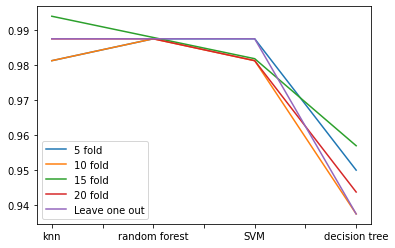

In [31]:
# data frame을 plot으로 표현
df_scores.plot.line()

In [18]:
# 위의 data frame을 참고로 성능이 높게 측정되었던 모델의 설정값 출력
print("1. best knn model           : {}".format(knn_cv15.best_estimator_))
print("2. best decision tree model : {}".format(tree_cv15.best_estimator_))
print("3. best SVM model           : {}".format(svm_loo.best_estimator_))
print("4. best random forest model : {}".format(forest_cv15.best_estimator_))

1. best knn model           : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=1,
                     weights='uniform')
2. best decision tree model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
3. best SVM model           : SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
4. best random forest model : RandomForestCla

In [17]:
# 최종 성능평가
print("Test set accuracy in best KNN          : {:.3f}".format(knn.score(X_test, y_test)))
print("Test set accuracy in best Decision tree: {:.3f}".format(tree.score(X_test, y_test)))
print("Test set accuracy in best SVM          : {:.3f}".format(svm.score(X_test, y_test)))
print("Test set accuracy in best Random forest: {:.3f}".format(forest.score(X_test, y_test)))

Test set accuracy in best KNN          : 0.944
Test set accuracy in best Decision tree: 0.944
Test set accuracy in best SVM          : 1.000
Test set accuracy in best Random forest: 0.944
